In [39]:
%matplotlib inline
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from adjustText import adjust_text
from scipy import stats
from venn import venn
import itertools

In [69]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
# file_name = 'longest.mk.vM_tG.tsv'
# file_name = 'longest.mk.vM_tG_pN.tsv'
# file_name = 'longest.mk.strict.vM_tG_pN.tsv'
file_name = 'MK_test_vidCha_group/gene.longest.mk.tsv'

file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')
df = df.dropna()

df.head()

,gene,transcript,pN,pS,dN,dS,mk.raw.p.value,mk.odds.ni,dos
0,LOC100232083,LOC100232083_rna-XM_030265831.3.1,13.0,16.0,62.5,82.5,1.000000,1.074597,-0.017241
2,RPAP2,RPAP2_rna-XM_041717792.1.9,2.0,1.0,12.0,11.0,1.000000,1.833333,-0.144928
11,MEGF9,MEGF9_rna-XM_030287003.3.25,4.0,1.0,7.5,7.5,0.337805,4.000000,-0.300000
19,ANXA5,ANXA5_rna-XM_002187807.5.32,1.0,0.0,3.0,14.0,0.222222,inf,-0.823529
22,LOC100220974,LOC100220974_rna-XM_041716640.1.4,0.0,1.0,1.0,8.0,1.000000,0.000000,0.111111


In [70]:
# df['gene'] = [t.split('_')[0] for t in df['transcript']]
min_odds = df[df['mk.odds.ni'] != 0]['mk.odds.ni'].min()
max_odds = df[df['mk.odds.ni'] != float('inf')]['mk.odds.ni'].max()
df['corr.ni'] = [min_odds/4 if i==0 else max_odds*4 if i==float('inf') else i for i in df['mk.odds.ni']]
# df['adj.pval'] = smt.multipletests(list(df['mk.raw.p.value']), method='fdr_bh', is_sorted=False)[1]
df['log.pval'] = -np.log10(df['mk.raw.p.value'])
df['log.ni'] = -np.log10(df['corr.ni'])

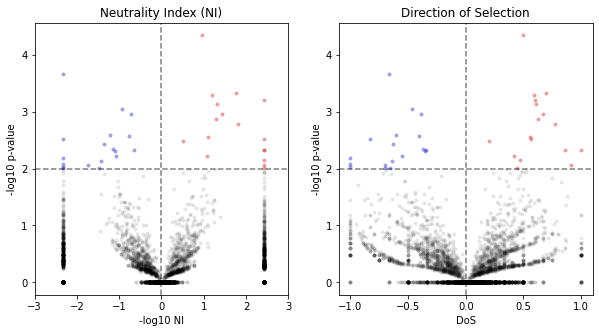

In [71]:
# selected_genes = ['GYS2', 'PTCHD1', 'LEMD2', 'NXPH3', 'LRRTM3', 'LEMD2', 'AGRN', 'CACNB1',
#                   'CNTNAP1', 'NLGN3', 'PCM1', 'SPTBN4', 'TNC', 'TUBGCP2', 'UNC5B', 'VPS13B']
# selected_genes = ['GRIN2C', 'NTRK2', 'PCM1', 'PKD1L2', 'TUBGCP2', 'TAS1R1', 'SI', 'TBC1D9', 'AAAS']
selected_genes = ['NTRK2']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axes[0], axes[1]


df_Dpos = df[(df['dos'] > 0) & (df['log.pval'] > 2)]
df_Ddel = df[(df['dos'] < 0) & (df['log.pval'] > 2)]
df_NIpos = df[(df['log.ni'] > 0) & (df['log.pval'] > 2)]
df_NIdel = df[(df['log.ni'] < 0) & (df['log.pval'] > 2)]

## Neutrality Index (OR)
sns.scatterplot(ax=ax1, data=df, x='log.ni', y='log.pval', alpha=0.1, linewidth=0, s=15, color='k')
sns.scatterplot(ax=ax1, data=df_NIpos, x='log.ni', y='log.pval', alpha=0.3, linewidth=0, s=15, color='red')
sns.scatterplot(ax=ax1, data=df_NIdel, x='log.ni', y='log.pval', alpha=0.3, linewidth=0, s=15, color='blue')
ax1.set_title('Neutrality Index (NI)')
ax1.set(xlabel='-log10 NI', ylabel='-log10 p-value')
ax1.set_xlim(-3,3)
ax1.axhline(2, color='k', alpha=0.5, ls='--')
ax1.axvline(0, color='k', alpha=0.5, ls='--')

## Directionality of Selection
sns.scatterplot(ax=ax2, data=df, x='dos', y='log.pval', alpha=0.1, linewidth=0, s=15, color='k')
sns.scatterplot(ax=ax2, data=df_Dpos, x='dos', y='log.pval', alpha=0.3, linewidth=0, s=15, color='red')
sns.scatterplot(ax=ax2, data=df_Ddel, x='dos', y='log.pval', alpha=0.3, linewidth=0, s=15, color='blue')
ax2.set_title('Direction of Selection')
ax2.set(xlabel='DoS', ylabel='-log10 p-value')
ax2.axhline(2, color='k', alpha=0.5, ls='--')
ax2.axvline(0, color='k', alpha=0.5, ls='--')


# labels = []
# for x, y, g in zip(df_NIpos['log.ni'], df_NIpos['log.pval'], df_NIpos['gene']):
#     if (g in selected_genes) or ((y > 3.5) and (not g.startswith('LOC'))):
#         labels.append(ax1.text(x=x, y=y, s=g, color='red'))
        
# labels = []
# for x, y, g in zip(df_Dpos['dos'], df_Dpos['log.pval'], df_Dpos['gene']):
#     if (g in selected_genes) or ((y > 2.5) and (not g.startswith('LOC'))):
#         labels.append(ax2.text(x=x, y=y, s=g, color='red'))

        
# labels = []
# for x, y, g in zip(df_Ddel['dos'], df_Ddel['log.pval'], df_Ddel['gene']):
#     if (g in selected_genes) or ((y > 2.5) and (not g.startswith('LOC'))):
#         labels.append(ax2.text(x=x, y=y, s=g, color='blue'))
        
# pdf_name = 'ni.dos.pval_volcanos.mk_test.vM_tG.pdf'
# pdf_name = 'ni.dos.pval_volcanos.mk_test.vM_tG_pN.pdf'
# pdf_name = 'ni.dos.pval_volcanos.mk_test.strict.vM_tG_pN.pdf'
pdf_name = 'ni.dos.pval_volcanos.mk_test.vC_tG_pN.pdf'

# fig.savefig(pdf_name, bbox_inches='tight')

In [73]:
df_Dpos.sort_values(by='log.pval', ascending=False)['gene']

14616           DNAH1
17640           TIGD4
14145        CEP112_0
454           CTTNBP2
13680            ODF2
499            CCDC77
3850             URI1
14138           RASA2
1332     LOC100228361
4038     LOC100225050
1312           DNAH17
3391            ALG14
8253     LOC115496113
11336    LOC100223270
8284            BRIP1
17786           CENPN
8190             CRB1
Name: gene, dtype: object

In [76]:
df_Ddel.sort_values(by='log.pval', ascending=False)
df[df['gene'] == 'PIEZO1']

,gene,transcript,pN,pS,dN,dS,mk.raw.p.value,mk.odds.ni,dos,corr.ni,log.pval,log.ni


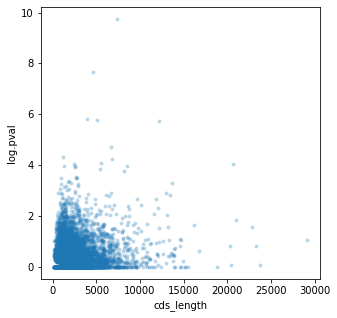

In [13]:
## Add CDS length
file_name = 'longest.transcript-counts.vM_tG_pN.tsv'
file_data = glob(dir_path + file_name)[0]
cds_df = pd.read_csv(file_data, sep='\t')
df_merged = pd.merge(df, cds_df, on='transcript')

## Correlation between significance and CDS length? NOPE
fig, axes = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_merged[df_merged['cds_length']<30000], y='log.pval', x='cds_length',
                alpha=0.3, linewidth=0, s=15)

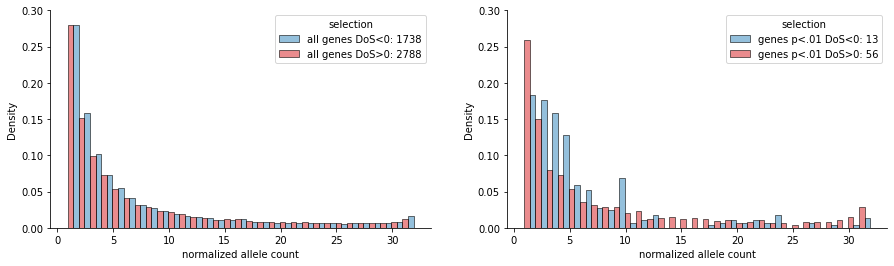

In [129]:
## Allele frequency spectra
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites/MK_test/'
file_name = 'AF.by_category.tsv'
file_data = glob(dir_path + file_name)[0]
af_df = pd.read_csv(file_data, sep='\t')
af_df['count'] = af_df['AF'] * 32

af_df_strong = af_df[af_df['selection'].isin(['strong_positive', 'strong_negative'])]
af_df_rand = af_df[af_df['selection'].isin(['rand_positive', 'rand_negative', 'all_positive', 'all_negative'])]

## plot
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
ax1, ax2 = axes[0], axes[1]
sns.set_palette(['#d7191c', '#2b83ba'])


sns.histplot(ax=ax1, data=af_df_rand, x='count', hue='selection', binwidth=1, 
             stat='density', common_norm=False, multiple="dodge", alpha=0.5)
sns.histplot(ax=ax2, data=af_df_strong, x='count', hue='selection', binwidth=1, 
             stat='density', common_norm=False, multiple="dodge", alpha=0.5)

ax1.set(xlabel='normalized allele count')
ax2.set(xlabel='normalized allele count')
ax1.legend(title='selection', loc='upper right', labels=['all genes DoS<0: 1738', 'all genes DoS>0: 2788'])
ax2.legend(title='selection', loc='upper right', labels=['genes p<.01 DoS<0: 13', 'genes p<.01 DoS>0: 56'])
ax1.set(ylim=(0, 0.3))
ax2.set(ylim=(0, 0.3))
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

pdf_name = 'spectra_AF_all_and_strong.pdf'

# fig.savefig(pdf_name, bbox_inches='tight')

all nonsyn variants DoS>0 vs DoS<0, p-value: 1.0
strong nonsyn variants DoS>0 vs DoS<0, p-value: 1.9303894371880403e-07


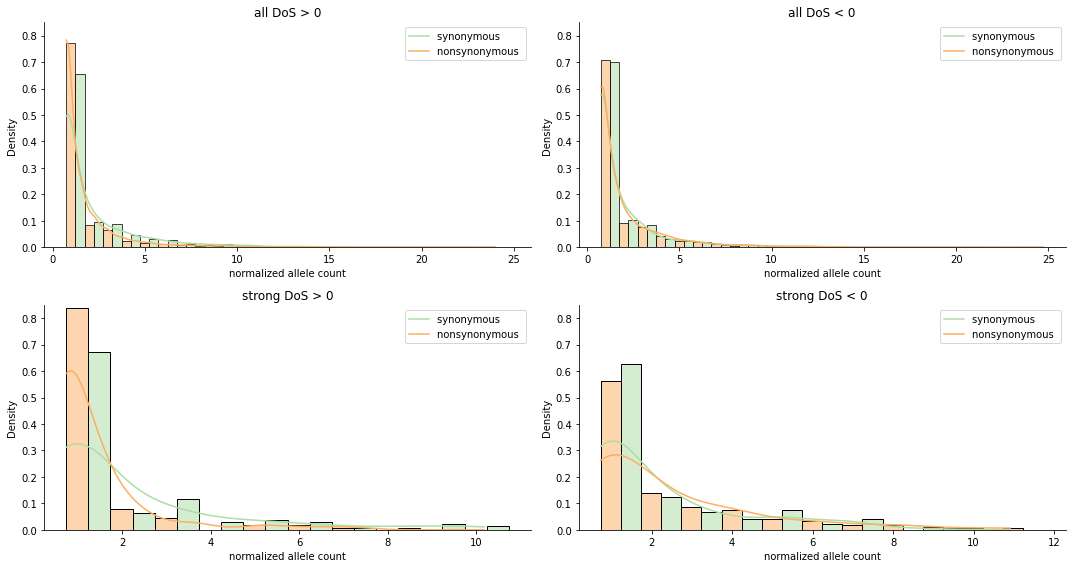

In [81]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
# file_name = 'strict_filt.AF.by_category.snpEff.tsv'
# file_name = 'MK_test_vidMac_group/snpEff/AF.by_category.snpEff.tsv'
file_name = 'MK_test_vidCha_group/snpEff/AF.by_category.snpEff.tsv'

file_data = glob(dir_path + file_name)[0]
af_df = pd.read_csv(file_data, sep='\t')
af_df['count'] = af_df['AF'] * 32

data_all_pos = af_df[af_df['selection_conservative'] == 'all_positive']
data_all_neg = af_df[af_df['selection_conservative'] == 'all_negative']
data_strong_pos = af_df[af_df['selection_conservative'] == 'strong_positive']
data_strong_neg = af_df[af_df['selection_conservative'] == 'strong_negative']
# af_df_strong = af_df[af_df['selection'].isin(['strong_positive', 'strong_negative'])]
af_df_rand = af_df[af_df['selection'].isin(['rand_positive', 'rand_negative', 'all_positive', 'all_negative'])]

## plot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]
sns.set_palette(['#fdae61', '#abdda4'])

## all genes
sns.histplot(ax=ax1, data=data_all_pos, x='count', 
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

sns.histplot(ax=ax2, data=data_all_neg, x='count',
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

## strong genes
sns.histplot(ax=ax3, data=data_strong_pos, x='count', 
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

sns.histplot(ax=ax4, data=data_strong_neg, x='count',
             hue='impact', binwidth=1, stat='density', common_norm=False, multiple="dodge", kde=True)

ax1.set_title('all DoS > 0')
ax2.set_title('all DoS < 0')
ax3.set_title('strong DoS > 0')
ax4.set_title('strong DoS < 0')

for axi in [ax1, ax2, ax3, ax4]:
    axi.legend(title='', loc='upper right', labels=['synonymous ', 'nonsynonymous '])
    axi.set(xlabel='normalized allele count')
    axi.set(ylim=(0, 0.85))

fig.tight_layout()  
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)

pdf_name = 'spectra_AF_sym_nonsym.all_and_strong.pos_and_neg.pdf'

# fig.savefig(pdf_name, bbox_inches='tight')


### Compare distributions
print('all nonsyn variants DoS>0 vs DoS<0, p-value: {}'.format(stats.ks_2samp(data_all_pos[data_all_pos['impact'] == 'missense_variant']['AF'], 
               data_all_neg[data_all_neg['impact'] == 'missense_variant']['AF'], 
               alternative='two-sided')[1]))
print('strong nonsyn variants DoS>0 vs DoS<0, p-value: {}'.format(stats.ks_2samp(data_strong_pos[data_strong_pos['impact'] == 'missense_variant']['AF'], 
               data_strong_neg[data_strong_neg['impact'] == 'missense_variant']['AF'], 
               alternative='two-sided')[1]))

In [23]:
dir_path = '/Users/osipova/Documents/LabDocs/Brood_parasites_analysis/'
dbs = ['vidMac', 'vidCha']
file_names = ['MK_test_vidMac_group/gene.longest.mk.tsv', 'MK_test_vidCha_group/gene.longest.mk.tsv']

D = {}
for db in dbs:
    file_name = 'MK_test_{}_group/gene.longest.mk.tsv'.format(db)
    file_data = glob(dir_path + file_name)[0]
    d = pd.read_csv(file_data, sep='\t')
    d = d.dropna()
    D[db] = d

In [36]:
def get_genes_dos_pval(d, dos, pval):
    ## returns list of genes from dataframe according to requested thresholds
    
    if dos == 'pos':
        return set(d[(d['dos'] > 0) & (d['mk.raw.p.value'] < pval)]['gene'])
    if dos == 'neg':
        return set(d[(d['dos'] < 0) & (d['mk.raw.p.value'] < pval)]['gene'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


{'DNAH17', 'TIGD4', 'CCDC77'}
set()
{'FAS', 'DNAH1', 'URI1', 'ODF2', 'ITGB2', 'TIGD4', 'PHRF1', 'COL6A3', 'ANKRD12', 'CFH', 'DNAH17', 'CCDC77'}
set()
{'FAS', 'DNAH1', 'LOC100225050', 'LOC115496978', 'URI1', 'ODF2', 'LOC116807770', 'COL6A3', 'CFH', 'DNAH17', 'CCDC77', 'POT1', 'CD2', 'SMPDL3A', 'LOC100231862', 'TIGD4', 'PHRF1', 'IDH3A', 'LOC115496920', 'ITGB2', 'C5H14orf39', 'ANKRD12', 'FTO', 'ORC1'}
{'MDN1', 'MSH6', 'NLGN3', 'NEK1'}


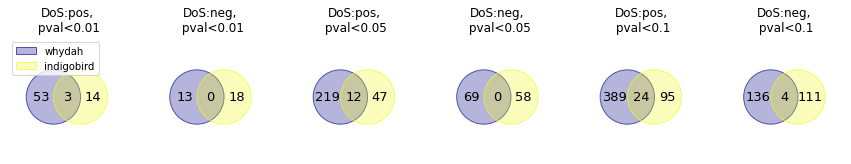

In [65]:
## Calculate overlap between dbs
d1 = D['vidMac']
d2 = D['vidCha']
# db_sets = [ 'vidMac_str_pos', 'vidMac_str_neg', 'vidMac_pos', 'vidMac_neg',
#             'vidCha_str_pos', 'vidCha_str_neg', 'vidCha_pos', 'vidCha_neg']


fig, axes = plt.subplots(1, 6, figsize=(15, 8))


x = [('pos', .01), ('neg', .01), ('pos', .05), ('neg', .05), ('pos', .1), ('neg', .1)]

for i in range(len(x)):
    db_set = x[i]
    dos = db_set[0]
    pval = db_set[1]
    all_db_sets = {}
    set_info1 = 'vidMac_{}_{}'.format(dos, pval)
    set_info2 = 'vidCha_{}_{}'.format(dos, pval)
    all_db_sets[set_info1] = get_genes_dos_pval(d1, dos, pval)
    all_db_sets[set_info2] = get_genes_dos_pval(d2, dos, pval)
    print(all_db_sets[set_info1] & all_db_sets[set_info2]) 
    
    axi = axes[i]
    venn(all_db_sets, cmap='plasma', alpha=0.3, ax=axi)
    axi.set_title('DoS:{},\n pval<{}'.format(dos, pval))
    if i != 0:
        axi.legend(frameon=False)
    else:
        axi.legend(loc='upper left', labels=['whydah', 'indigobird'])
        
pdf_name = 'venns.DoS_pval.vidMac_vidCha.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')